LOAD DATA 

In [1]:
import numpy as np
import os
from tqdm import tqdm

In [2]:
from utils import run, visualise, inspect_groundtruth_trajectory

In [3]:

data_path = 'task2_data'
file_list = os.listdir(data_path)
file_count = len(file_list)

print(f"The number of scenarios under {data_path} is: {file_count}")

dt = 0.1
current_timestep = 10
future_seconds = (3, 5, 8)

scenario_indices = [5, 30, 45, 67, 90, 121, 136, 189, 201, 250]
time_indices = [0, 1, 2, 0, 1, 2, 0, 1, 2, 2]

# Random scenarios and prediction horizon for visualisation (uncomment to use randomly selected scenarios and prediction horizon for visualisation)
# scenario_indices = np.random.choice(file_count, 10)
# time_indices = np.random.choice(3, 10)


The number of scenarios under task2_data is: 287


Q1. Use a constant velocity model to predict the future trajectories of the target agents at 3s, 5s, and 8s. Then, calculate the Average Displacement Error (ADE) and Final Displacement Error (FDE). The results should be averaged across all target agents and scenarios.

ADE| ADE(3s) | ADE(5s) | ADE(8s) |
FDE| FDE(3s) | FDE(5s) | FDE(8s) |

In [4]:
all_ade = [[] for _ in range(len(future_seconds))]
all_fde = [[] for _ in range(len(future_seconds))]
all_pred = []
all_gt = []
for scenario in tqdm(file_list):
    path = os.path.join(data_path, scenario)
    data = np.load(path, allow_pickle=True)
    pred = []
    gt = []
    for i, seconds in enumerate(future_seconds):
        ade, fde, valid_pred, valid_gt = run('cv', data, current_timestep, dt, seconds)
        all_ade[i].extend(ade)
        all_fde[i].extend(fde)
        pred.append(valid_pred)
        gt.append(valid_gt)

    all_pred.append(pred)
    all_gt.append(gt)

for seconds, ade, fde in zip(future_seconds, all_ade, all_fde):
    average_ade = sum(ade) / len(ade)
    average_fde = sum(fde) / len(fde)
    print(f'Future {seconds}s, Average ADE={average_ade}, Average FDE={average_fde}')


100%|██████████| 287/287 [00:01<00:00, 196.81it/s]

Future 3s, Average ADE=1.7747710662439704, Average FDE=4.815347607147807
Future 5s, Average ADE=4.467095053374373, Average FDE=12.333537324231145
Future 8s, Average ADE=9.400351142728635, Average FDE=25.75123572386691


Prediction of future 3s for scenario=9f71faace5b5e5ab


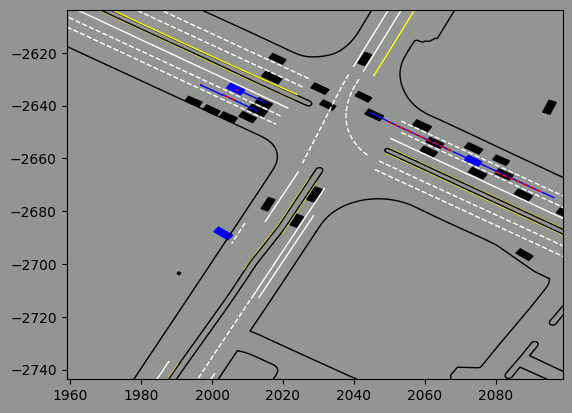

Prediction of future 5s for scenario=9ceb8ef8c79b22a6


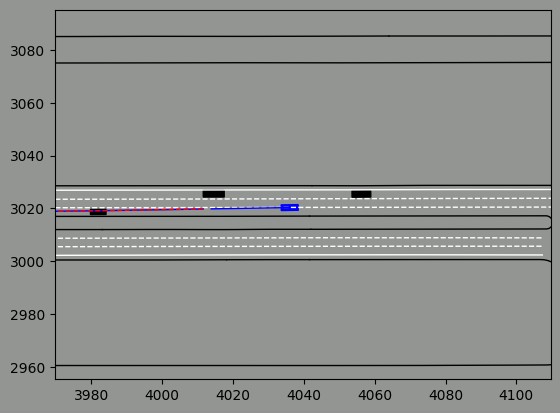

Prediction of future 8s for scenario=f67b61fa876e88fb


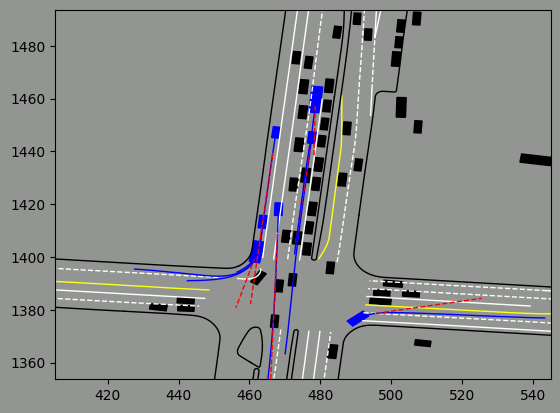

Prediction of future 3s for scenario=c6d3e9d6c619e786


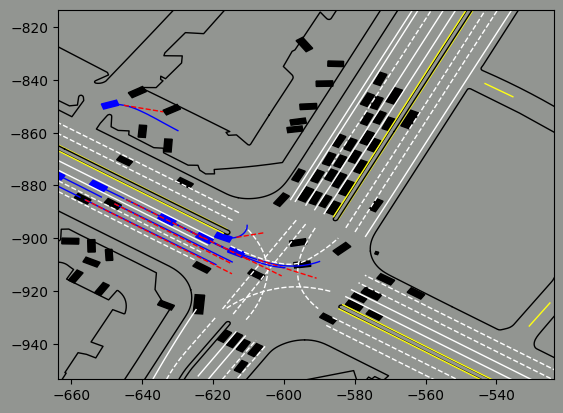

Prediction of future 5s for scenario=b26ba622ddc9d7d8


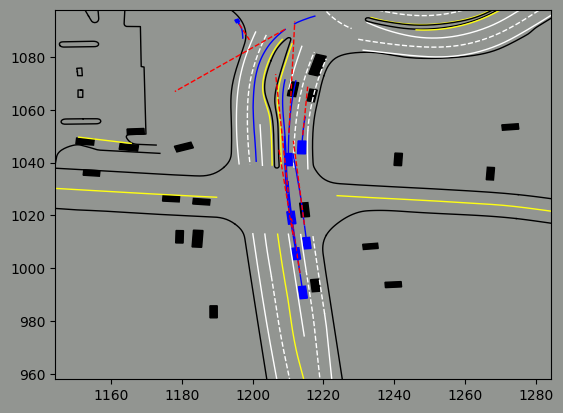

Prediction of future 8s for scenario=2c5702a36704c1ba


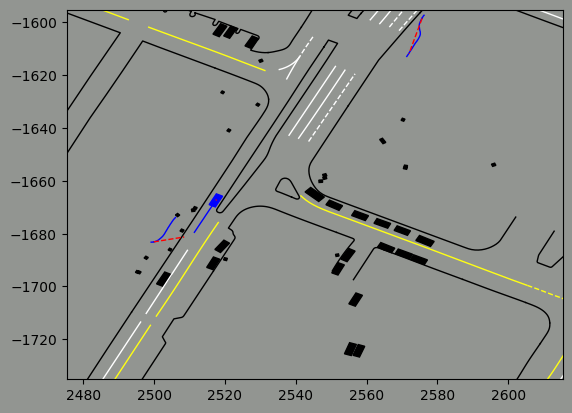

Prediction of future 3s for scenario=7a4dc4eb40f93323


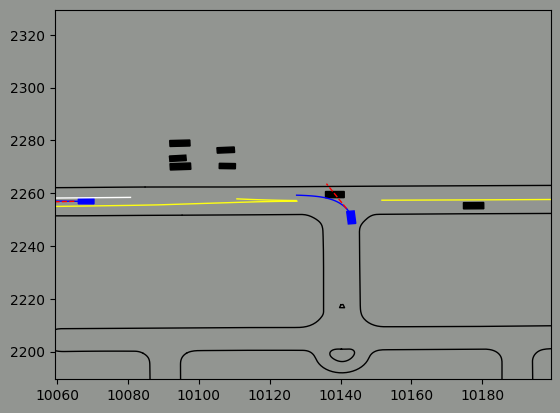

Prediction of future 5s for scenario=acdd3387d634ddd0


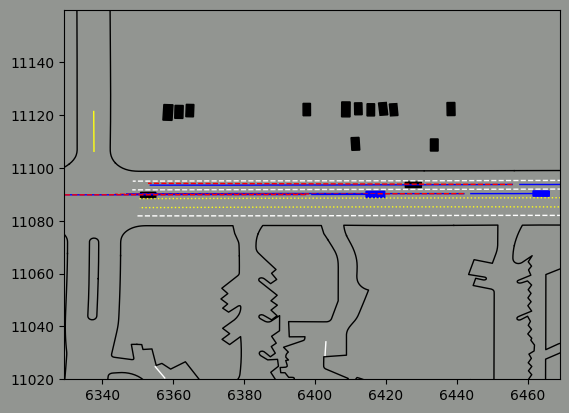

Prediction of future 8s for scenario=e6992acc4551b1c1


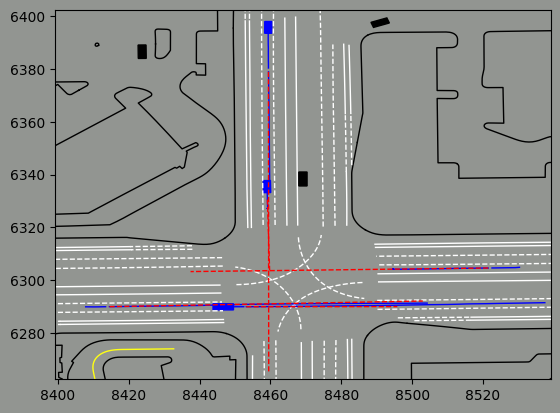

Prediction of future 8s for scenario=d339749a3725756c


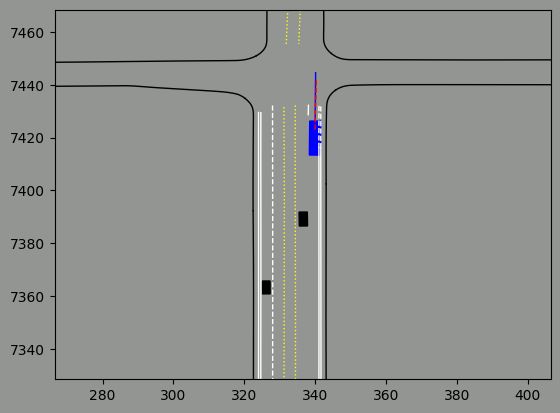

In [5]:
# Randomly visualise 10 scenarios
for scenario_index, time_index in zip(scenario_indices, time_indices):
    pred = all_pred[scenario_index][time_index]
    gt = all_gt[scenario_index][time_index]
    path = os.path.join(data_path, file_list[scenario_index])
    data = np.load(path, allow_pickle=True)
    scenario_id = data['scenario_id']
    print(f'Prediction of future {future_seconds[time_index]}s for scenario={scenario_id}')
    visualise(data, current_timestep, pred, gt, save=True, file_prefix='cv')


Q2. Use a constant acceleration model to predict the future trajectories of the target agents at 3s, 5s, and 8s. Then, calculate the Average Displacement Error (ADE) and Final Displacement Error (FDE). The results should be averaged across all target agents and scenarios.

ADE| ADE(3s) | ADE(5s) | ADE(8s) |
FDE| FDE(3s) | FDE(5s) | FDE(8s) |

In [6]:
all_ade = [[] for _ in range(len(future_seconds))]
all_fde = [[] for _ in range(len(future_seconds))]
all_pred = []
all_gt = []
for scenario in tqdm(file_list):
    path = os.path.join(data_path, scenario)
    data = np.load(path, allow_pickle=True)
    pred = []
    gt = []
    for i, seconds in enumerate(future_seconds):
        ade, fde, valid_pred, valid_gt = run('ca', data, current_timestep, dt, seconds)
        all_ade[i].extend(ade)
        all_fde[i].extend(fde)
        pred.append(valid_pred)
        gt.append(valid_gt)

    all_pred.append(pred)
    all_gt.append(gt)

for seconds, ade, fde in zip(future_seconds, all_ade, all_fde):
    average_ade = sum(ade) / len(ade)
    average_fde = sum(fde) / len(fde)
    print(f'Future {seconds}s, Average ADE={average_ade}, Average FDE={average_fde}')

100%|██████████| 287/287 [00:01<00:00, 175.01it/s]

Future 3s, Average ADE=5.260263627310501, Average FDE=14.838099952935822
Future 5s, Average ADE=14.1976890556386, Average FDE=41.37652619868657
Future 8s, Average ADE=32.24363362580444, Average FDE=95.4862515617611


Prediction of future 3s for scenario=9f71faace5b5e5ab


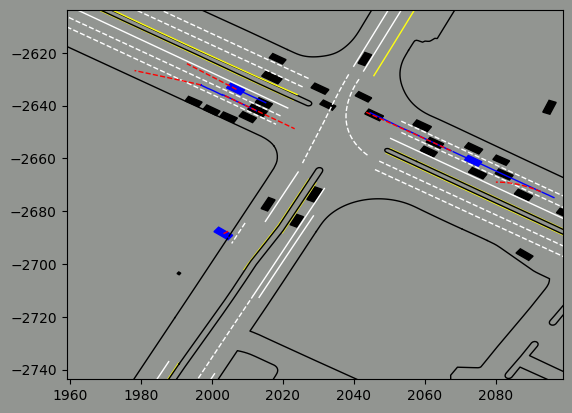

Prediction of future 5s for scenario=9ceb8ef8c79b22a6


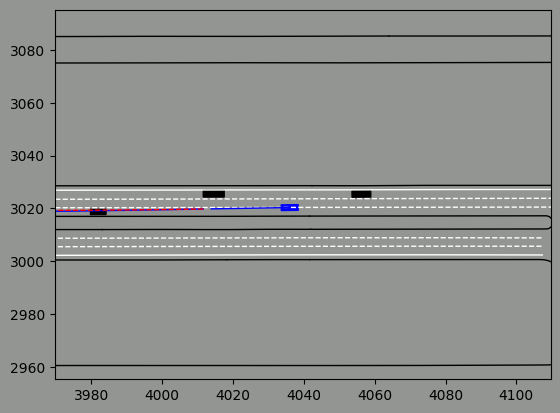

Prediction of future 8s for scenario=f67b61fa876e88fb


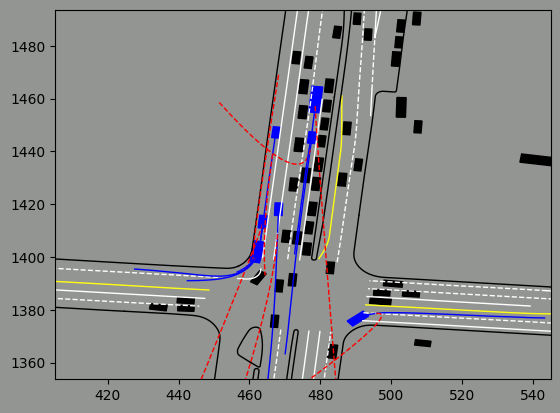

Prediction of future 3s for scenario=c6d3e9d6c619e786


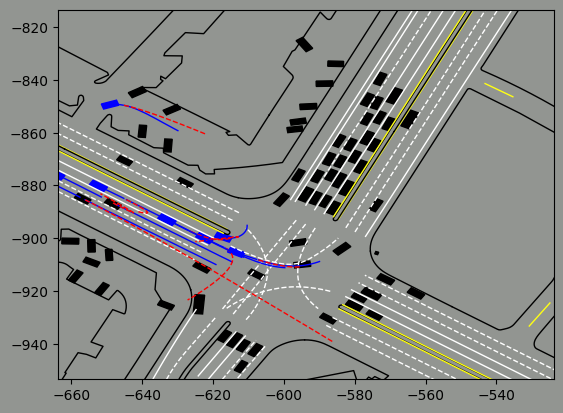

Prediction of future 5s for scenario=b26ba622ddc9d7d8


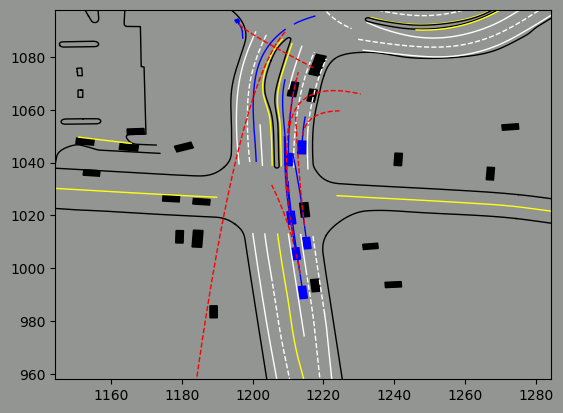

Prediction of future 8s for scenario=2c5702a36704c1ba


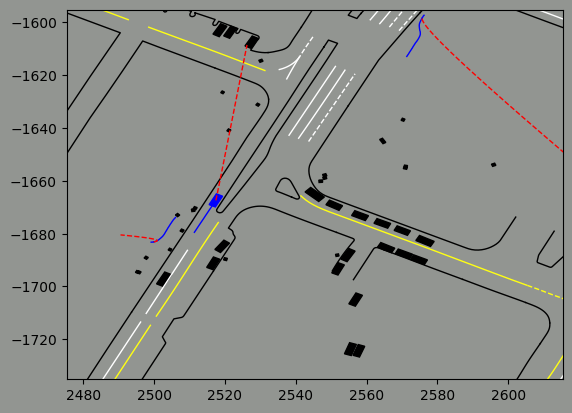

Prediction of future 3s for scenario=7a4dc4eb40f93323


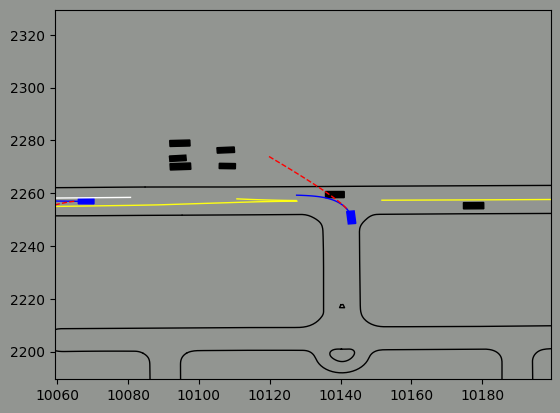

Prediction of future 5s for scenario=acdd3387d634ddd0


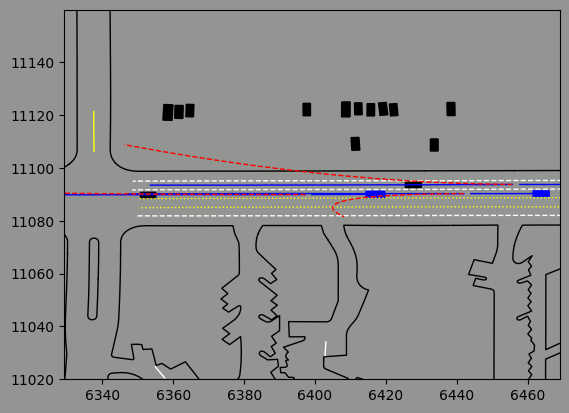

Prediction of future 8s for scenario=e6992acc4551b1c1


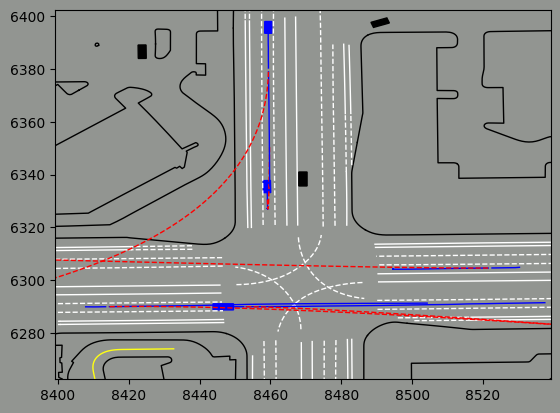

Prediction of future 8s for scenario=d339749a3725756c


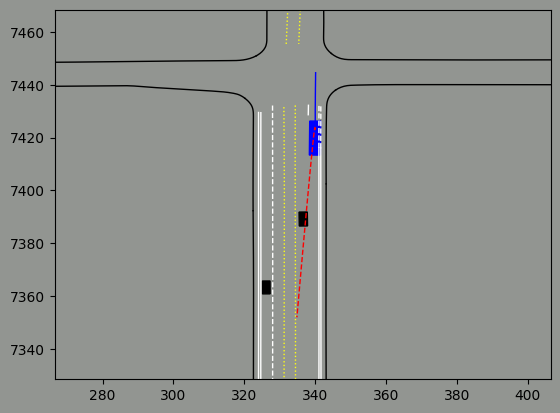

In [7]:
# Randomly visualise 10 scenarios
for scenario_index, time_index in zip(scenario_indices, time_indices):
    pred = all_pred[scenario_index][time_index]
    gt = all_gt[scenario_index][time_index]
    path = os.path.join(data_path, file_list[scenario_index])
    data = np.load(path, allow_pickle=True)
    scenario_id = data['scenario_id']
    print(f'Prediction of future {future_seconds[time_index]}s for scenario={scenario_id}')
    visualise(data, current_timestep, pred, gt, save=True, file_prefix='ca')

Briefly discuss the observations from your results. 

Inspecting velocity curve of agent 99 in bb2c545bd3133e12


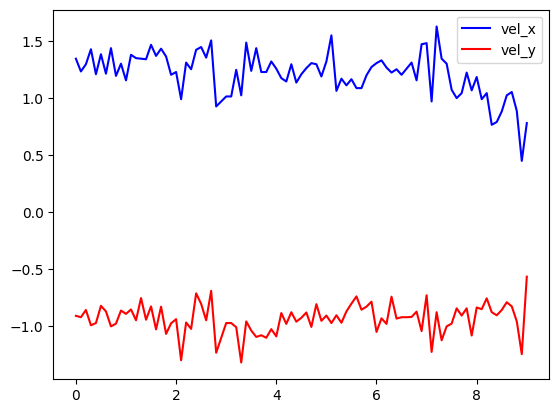

In [8]:
scenario_index = 169 #30

path = os.path.join(data_path, file_list[scenario_index])
data = np.load(path, allow_pickle=True)
tracks = data['predict_list']
agents_of_interest = data['all_agent'][tracks]

print(f"Inspecting velocity curve of agent {tracks[0]} in {data['scenario_id']}")

inspect_groundtruth_trajectory(agents_of_interest[0], dt)
